In [17]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import os
import numpy as np
from pylab import *
# %matplotlib notebook

def surface_plot(X,Y,Z,**kwargs):
    """ WRITE DOCUMENTATION
    """
    ion()
    xlabel, ylabel, zlabel, title = kwargs.get('xlabel',""), kwargs.get('ylabel',""), kwargs.get('zlabel',""), kwargs.get('title',"")
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X,Y,Z, c='r',marker='o')
#     ax.plot_surface(X,Y,Z)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)
    plt.show()
    plt.close()

In [18]:
def parse_stats_data(line):
    split_info = line.strip('\n').split(',')
    original_resolution = split_info[0].split('x')
    compressed_resolution = split_info[1].split('x')
    int_original_resolution = int(original_resolution[0]) *int(original_resolution[1])
    int_compressed_resolution = int(compressed_resolution[0]) *int(compressed_resolution[1])
    data_list = []
    for i, d in enumerate(split_info[2:]):
        if d == 'nan':
            data_list.append(np.nan)
        else:
            data_list.append(float(d))
    data_list.insert(0,int_compressed_resolution)
    data_list.insert(0,int_original_resolution)
    
    return original_resolution, compressed_resolution, data_list
    

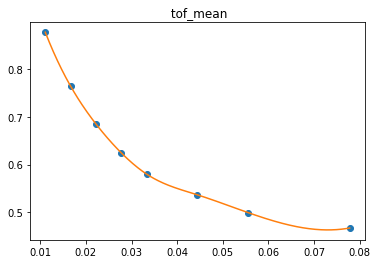

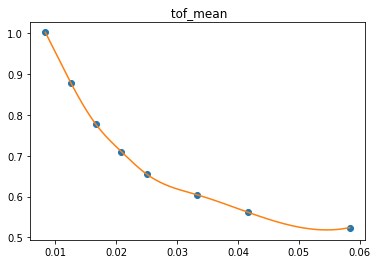

In [62]:
cur_dir = os.getcwd()

# replace the name of the stats file to the one that you want to analyse
stats_path = os.path.join(cur_dir, 'video_analysis\original_videos\log\stats_10311226.txt')

title_list = []
data_list = []
with open(stats_path, 'r') as f:
    i = 0
    ori_res_list = []
    comp_res_list = []
    for line in f.readlines():
        if (i==0):
            title_list = line.split(',')
            i += 1
            continue
        else:
            original_resolution, compressed_resolution, data = parse_stats_data(line)
            ori_res_list.append(original_resolution) 
            comp_res_list.append(compressed_resolution)
            data_list.append(data)

# np_data = np.asarray(data_list)
np_data=np.array([np.array(xi) for xi in data_list])
# print(np_data)

# 4: psnr
# 8: ssim
# 12: lpips
# 16: tof
# 20: tlp100

metric_index = 16
for i in range(len(data_list)//8):
    x = np.array([np.array(xi[1]) for xi in data_list[8*i:8*(i+1)]])
    y = np.array([np.array(xi[2]) for xi in data_list[8*i:8*(i+1)]])
    z = np.array([np.array(xi[metric_index]) for xi in data_list[8*i:8*(i+1)]])
    # print(x)
    # print(y)
    # print(z)
    # surface_plot(x,y,z)

    arg_list = np.argsort(y)

    x_sort = x[arg_list]
    y_sort = y[arg_list]
    z_sort = z[arg_list]
    
    from scipy.interpolate import interp1d

    xnew = np.linspace(y_sort.min(),y_sort.max(),300) #300 represents number of points to make between T.min and T.max

    f = interp1d(y_sort, z_sort, kind='cubic')

    # plt.plot(y_sort, z_sort)
    plt.figure()
    plt.plot(y_sort, z_sort, 'o', xnew, f(xnew), '-') #, xnew, f2(xnew), '--')
    plt.title(title_list[metric_index])
    plt.show()
    
#     x_grid = np.linspace(min(x), max(x) + 1, 1000*len(x))
#     y_grid = np.linspace(min(y), max(y) + 1, 1000*len(y))
#     B1, B2 = np.meshgrid(x_grid, y_grid, indexing='xy')
#     Z = np.zeros((x.size, z.size))

#     import scipy as sp
#     import scipy.interpolate
#     spline = sp.interpolate.Rbf(x,y,z,function='thin_plate',smooth=5, episilon=5)

#     Z = spline(B1,B2)
#     fig = plt.figure(figsize=(10,6))
#     ax = axes3d.Axes3D(fig)
#     ax.plot_wireframe(B1, B2, Z)
#     ax.plot_surface(B1, B2, Z,alpha=0.2)
#     ax.scatter3D(x,y,z, c='r')

